<a href="https://colab.research.google.com/github/Rishad1999/ImageProcessing_Assignment2_EG_2019_3722/blob/main/ImageProcessing_A2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

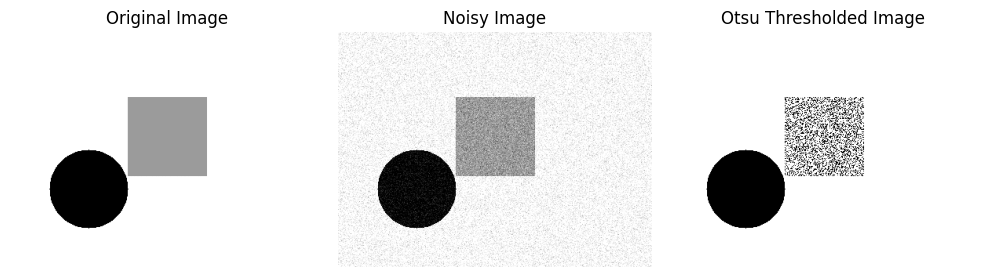

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise to an image
def adding_gaussian_noise(image, mean=0, sigma=25):
    row, col = image.shape
    gaussian = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 255)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

# Function to implement Otsu's algorithm
def otsu_threshold(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.sum()
    best_threshold = -1
    best_variance = 0

    for threshold in range(256):
        # For Background
        w0 = np.sum(hist_norm[:threshold])/np.sum(hist_norm[:256])
        if w0 == 0:
            continue
        mean0 = np.sum(np.arange(threshold) * hist_norm[:threshold]) / np.sum(hist_norm[:threshold])

        # For Foreground
        w1 = np.sum(hist_norm[threshold:])/np.sum(hist_norm[:256])
        if w1 == 0:
            continue
        mean1 = np.sum(np.arange(threshold, 256) * hist_norm[threshold:]) / np.sum(hist_norm[threshold:])

        # Within class variance
        within_class_variance = w0 * w1 *(mean0-mean1)**2

        # Updating best threshold
        if within_class_variance > best_variance:
            best_threshold = threshold
            best_variance = within_class_variance

    _, otsu_image = cv2.threshold(image, best_threshold, 255, cv2.THRESH_BINARY)
    return otsu_image

height = 300
width = 400

# Create a blank white image
image = np.ones((height, width), dtype=np.uint8) * 255

# Draw a circle and a square
cv2.circle(image, (height//3, width//2), 50, (0, 0, 0), -1)  # Circle with center (height//3, width//2) and radius 50
cv2.rectangle(image, (2*height//3 - 50, width//3 - 50), (2*height//3 + 50, width//3 + 50), (155, 155, 155), -1)  # Square with top-left and bottom-right corners

# Adding Gaussian noise
noisy_image = adding_gaussian_noise(image)

# Implement Otsu's algorithm
otsu_image = otsu_threshold(noisy_image)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_image, cmap='gray')
plt.title('Otsu Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()
